In [76]:
cbecs <- read.csv("./data/cbecs2018_final_public.csv")

- `ELUSED` Electricity used 
- `ELCNS` Building/energy supplier variable: Annual electricity consumption (kWh)
- `NFLOOR` Number of floors

In [77]:
cbecs_elused <- cbecs[cbecs$ELUSED == 1, ]
table(cbecs_elused$NFLOOR)
table(cbecs_elused$PBA)


   1    2    3    4    5    6    7    8    9  994  995 
2519 1364  711  421  273  179  126  122   90  278  274 


   1    2    4    5    6    7    8   11   12   13   14   15   16   17   18   23 
  85 1329   69  712   91  105  217   23  271  481  936  218  276  114  418  208 
  24   25   26   91 
  35  338  349   82 

In [78]:
cbecs_elused[cbecs_elused$NFLOOR == 994, "NFLOOR"] <- 12
cbecs_elused[cbecs_elused$NFLOOR == 995, "NFLOOR"] <- 20
table(cbecs_elused$NFLOOR)


   1    2    3    4    5    6    7    8    9   12   20 
2519 1364  711  421  273  179  126  122   90  278  274 

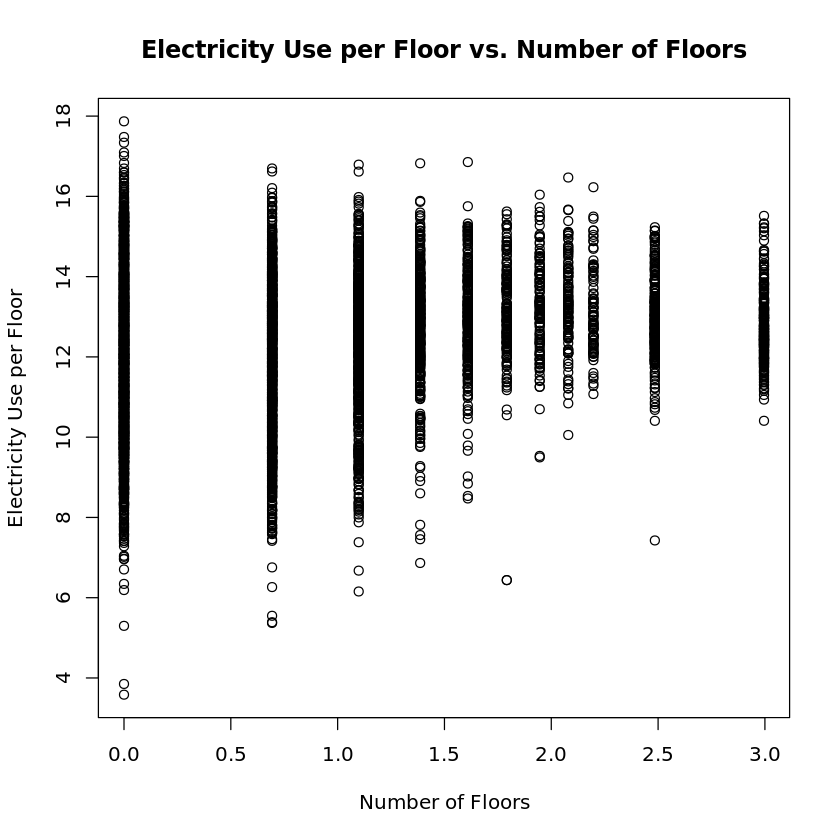

In [79]:
cbecs_elused$ecnf <- log(cbecs_elused$ELCNS / cbecs_elused$NFLOOR)
cbecs_elused$sqrtnfloor <- log(cbecs_elused$NFLOOR)
# Plot of ennf vs. NFLOOR
plot(cbecs_elused$sqrtnfloor, cbecs_elused$ecnf, xlab = "Number of Floors", ylab = "Electricity Use per Floor", main = "Electricity Use per Floor vs. Number of Floors")

In [80]:
model_lm <- lm(ecnf ~ sqrtnfloor, data = cbecs_elused)
summary(model_lm)


Call:
lm(formula = ecnf ~ sqrtnfloor, data = cbecs_elused)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.4271 -1.0963  0.0637  1.1964  5.8595 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.01064    0.02998  400.58   <2e-16 ***
sqrtnfloor   0.39869    0.02490   16.01   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.731 on 6355 degrees of freedom
Multiple R-squared:  0.03878,	Adjusted R-squared:  0.03863 
F-statistic: 256.4 on 1 and 6355 DF,  p-value: < 2.2e-16



Call:
lm(formula = ecnf ~ sqrtnfloor, data = cbecs_egyused_pba2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1756 -0.8020  0.0245  0.7963  5.2852 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.40970    0.06248   182.6   <2e-16 ***
sqrtnfloor   0.58617    0.03710    15.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.357 on 1327 degrees of freedom
Multiple R-squared:  0.1583,	Adjusted R-squared:  0.1577 
F-statistic: 249.7 on 1 and 1327 DF,  p-value: < 2.2e-16


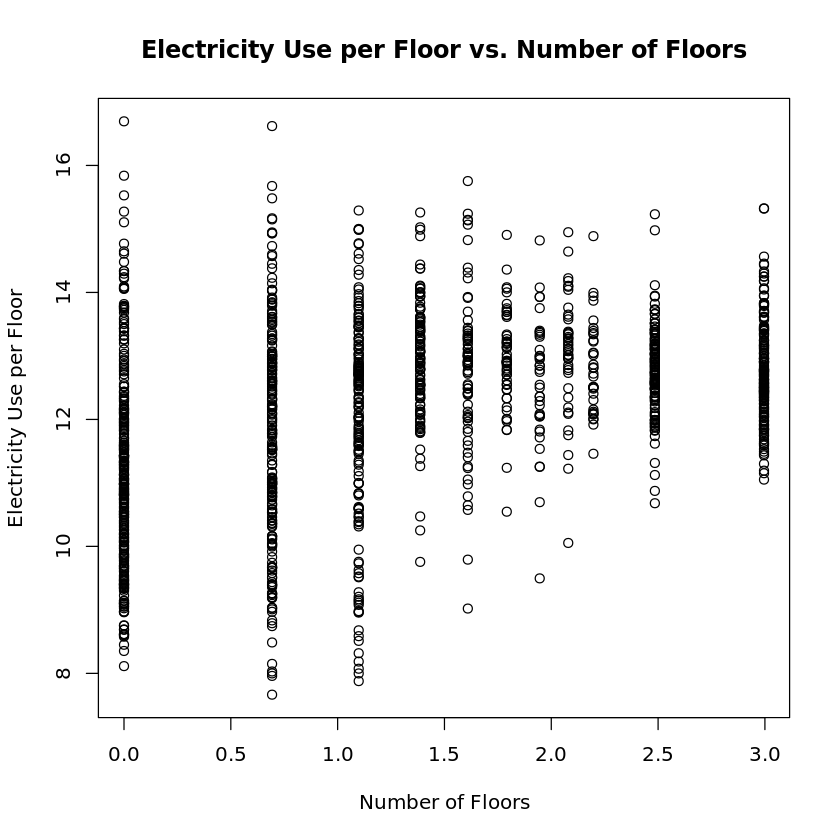

In [81]:
# Use data with PBA = 2
cbecs_egyused_pba2 <- cbecs_elused[cbecs_elused$PBA == 2, ]
model_lm_pba2 <- lm(ecnf ~ sqrtnfloor, data = cbecs_egyused_pba2)
summary(model_lm_pba2) 
plot(cbecs_egyused_pba2$sqrtnfloor, cbecs_egyused_pba2$ecnf, xlab = "Number of Floors", ylab = "Electricity Use per Floor", main = "Electricity Use per Floor vs. Number of Floors")

In [86]:
# For each number of floors, find the outliers and assign their value to closest non-outlier
# 定义一个函数来替换异常值
replace_outliers <- function(x) {
    # 计算四分位数和IQR
    Q1 <- quantile(x, 0.25, na.rm = TRUE)
    Q3 <- quantile(x, 0.75, na.rm = TRUE)
    IQR <- Q3 - Q1
    # 定义异常值的界限
    lower_bound <- Q1 - 1.5 * IQR
    upper_bound <- Q3 + 1.5 * IQR
    
    # 找出异常值并替换
    x[x < lower_bound] <- min(x[x >= lower_bound], na.rm = TRUE)
    x[x > upper_bound] <- max(x[x <= upper_bound], na.rm = TRUE)
    return(x)
}

# 应用函数到每个楼层数的分组上
library(dplyr)
cbecs_egyused_pba2 <- cbecs_egyused_pba2 %>%
    group_by(NFLOOR) %>%
    mutate(ecnf = replace_outliers(ecnf))


Call:
lm(formula = ecnf ~ sqrtnfloor, data = cbecs_egyused_pba2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1778 -0.8017  0.0211  0.7920  3.8645 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.40868    0.06116  186.55   <2e-16 ***
sqrtnfloor   0.58903    0.03632   16.22   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.328 on 1327 degrees of freedom
Multiple R-squared:  0.1655,	Adjusted R-squared:  0.1648 
F-statistic: 263.1 on 1 and 1327 DF,  p-value: < 2.2e-16


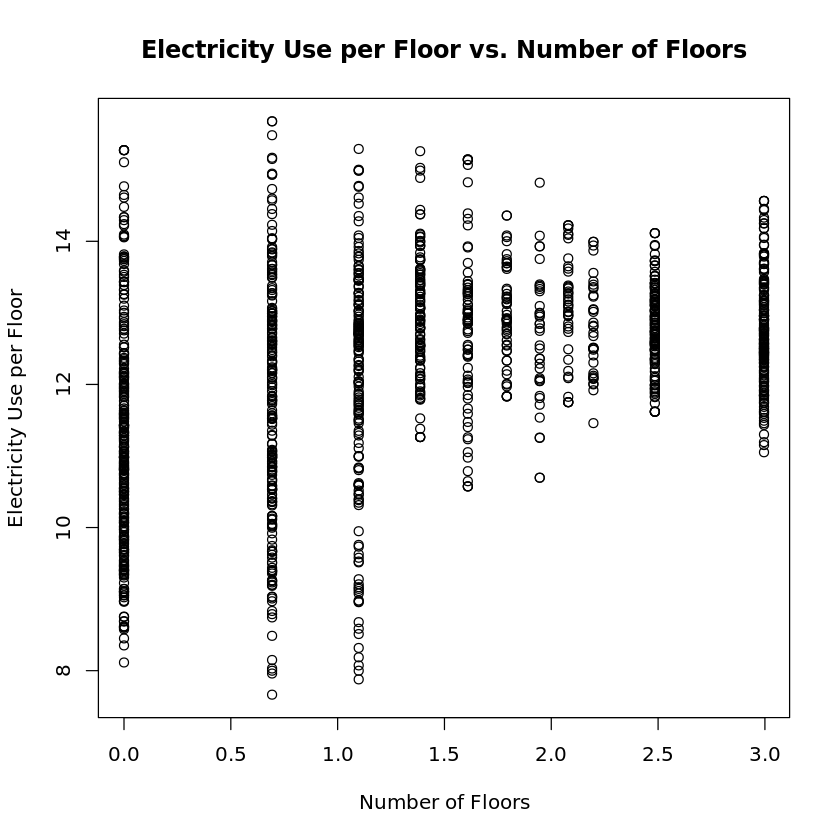

In [89]:
model_lm_pba2 <- lm(ecnf ~ sqrtnfloor, data = cbecs_egyused_pba2)
summary(model_lm_pba2)
plot(cbecs_egyused_pba2$sqrtnfloor, cbecs_egyused_pba2$ecnf, xlab = "Number of Floors", ylab = "Electricity Use per Floor", main = "Electricity Use per Floor vs. Number of Floors")


Call:
lm(formula = ecnf ~ sqrtnfloor + I(sqrtnfloor^2) + I(sqrtnfloor^3) + 
    I(sqrtnfloor^4), data = cbecs_egyused_pba2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3900 -0.7544  0.0179  0.7270  4.0508 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     11.22239    0.07752 144.760  < 2e-16 ***
sqrtnfloor      -1.02213    0.56149  -1.820 0.068925 .  
I(sqrtnfloor^2)  3.43827    0.92685   3.710 0.000216 ***
I(sqrtnfloor^3) -1.79381    0.49205  -3.646 0.000277 ***
I(sqrtnfloor^4)  0.27274    0.08192   3.330 0.000894 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.296 on 1324 degrees of freedom
Multiple R-squared:  0.2069,	Adjusted R-squared:  0.2045 
F-statistic: 86.35 on 4 and 1324 DF,  p-value: < 2.2e-16


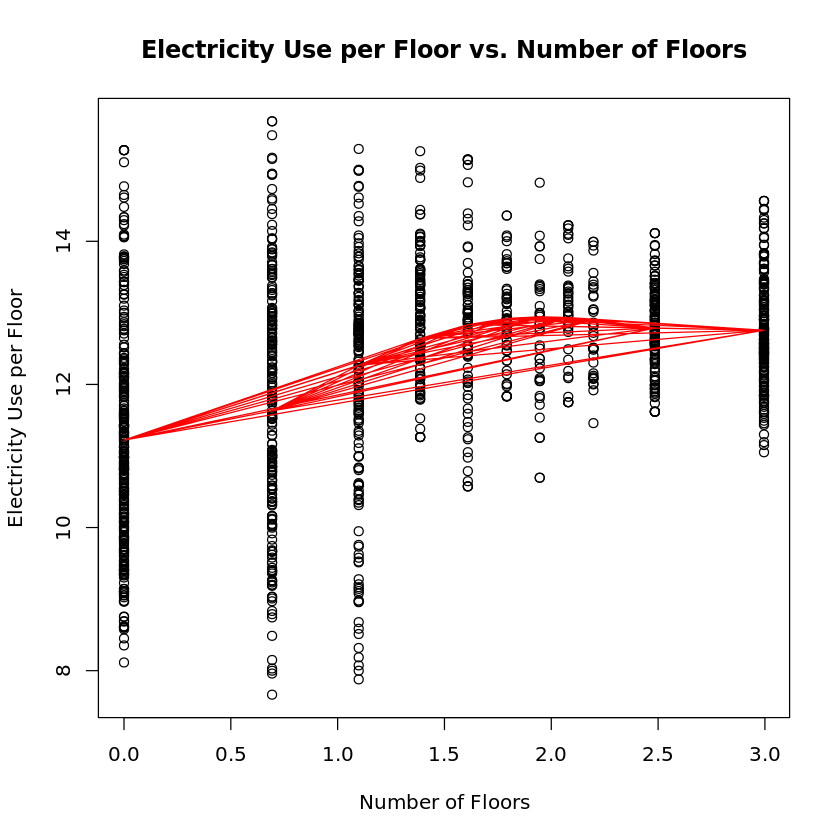

In [101]:
# Polynomial regression
model_lm_pba2_poly <- lm(ecnf ~ sqrtnfloor + I(sqrtnfloor^2) + I(sqrtnfloor^3) + I(sqrtnfloor^4), data = cbecs_egyused_pba2)
summary(model_lm_pba2_poly)
plot(cbecs_egyused_pba2$sqrtnfloor, cbecs_egyused_pba2$ecnf, xlab = "Number of Floors", ylab = "Electricity Use per Floor", main = "Electricity Use per Floor vs. Number of Floors")
lines(cbecs_egyused_pba2$sqrtnfloor, predict(model_lm_pba2_poly), col = "red")

In [109]:
table(cbecs_egyused$YRCONC)


   2    3    4    5    6    7    8    9 
 666  459  712  843  984  963 1330  402 


Call:
lm(formula = ecnf ~ sqrtnfloor, data = cbecs_egyused_bldshp2)

Residuals:
    Min      1Q  Median      3Q     Max 
-643149 -496659 -265678  364413 2208247 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   596088      15780  37.774   <2e-16 ***
sqrtnfloor     19615      11556   1.697   0.0897 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 637700 on 3574 degrees of freedom
  (402 observations deleted due to missingness)
Multiple R-squared:  0.0008055,	Adjusted R-squared:  0.000526 
F-statistic: 2.881 on 1 and 3574 DF,  p-value: 0.0897


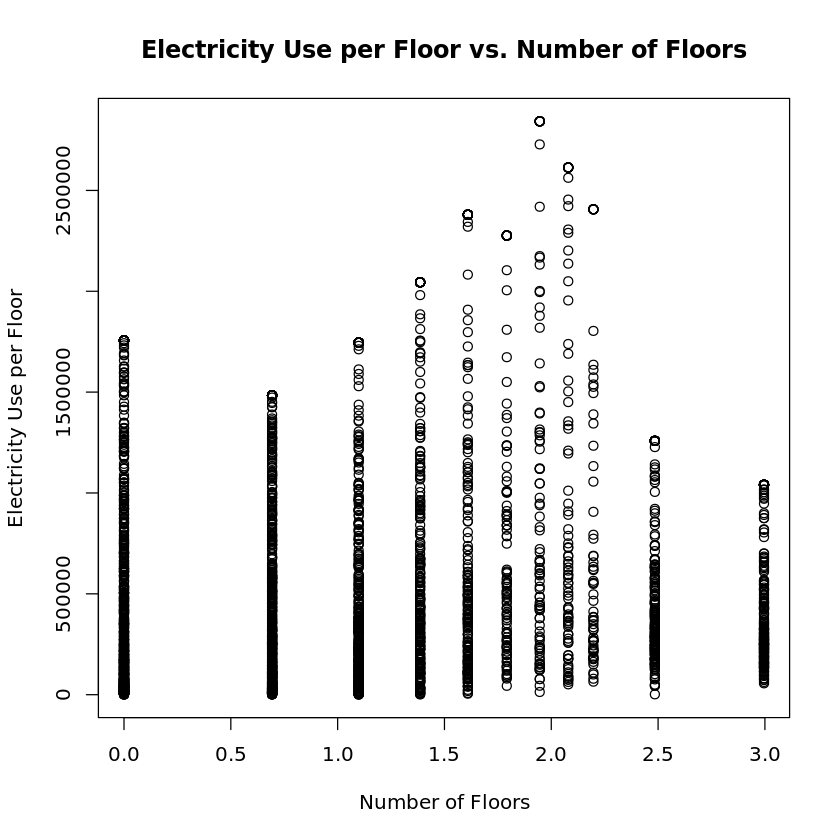

In [111]:
cbecs_egyused_bldshp2 <- cbecs_egyused[cbecs_egyused$RENOV == 1, ]
model_lm_bldshp2 <- lm(ecnf ~ sqrtnfloor, data = cbecs_egyused_bldshp2)
summary(model_lm_bldshp2)
plot(cbecs_egyused_bldshp2$sqrtnfloor, cbecs_egyused_bldshp2$ecnf, xlab = "Number of Floors", ylab = "Electricity Use per Floor", main = "Electricity Use per Floor vs. Number of Floors")